## Step 1: Lets begin by importing our libraries, reading in the data, and viewing our dataframe

In [65]:
# IMPORT Libraries 

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [66]:
# Now we need to read in the data
df = pd.read_csv(r'/Users/janice/My Python Stuff/AAA-My_Python_Projects/movies_2.csv') 

In [4]:
# Let's see if the data imported correctly:

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Step 2: Lets explore our data to see if we have any missing values. 

In [6]:
# One way of finding out if there are missing data!
df.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [7]:
# This tells us if there are ANY values missing. 

df.isnull().values.any()

True

In [8]:
# Now lets determine HOW MANY values are missing.

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
df["runtime"].isnull().sum()

4

In [10]:
# Now we know which columns contain missing values and 
# how many values in that column are missing

In [11]:
print(df.get("runtime").isnull().sum())

4


In [12]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime']


## Step 3: Lets remove the rows that have missing values.

#### Note: Since the missing data is about 29% of the total data, I have decided to remove the rows that contain the missing values. 

In [13]:
# Lets explore how the list looks so far
df.sort_values(by=['budget'], inplace=False, ascending=False)
# As we can see all the nulls are the bottom, now lets get rid of the null columns.

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,2.581888e+07,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,1.326600e+04,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [67]:
# Lets get rid of the nulls in the budget column. 

df.dropna(subset=['budget'], inplace=True)

In [15]:
# for when we want to look at all of the data. 

pd.set_option('display.max_rows', None)

In [68]:
# Now when we look again
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [70]:
df.sort_values(by=['budget'], inplace=False, ascending=True).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
471,A Polish Vampire in Burbank,Not Rated,Comedy,1983,"October 31, 1983 (United States)",5.0,275.0,Mark Pirro,Mark Pirro,Mark Pirro,United States,3000.0,NaN,Pirromount Pictures,80.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
3318,Following,R,Crime,1998,"November 5, 1999 (United Kingdom)",7.5,89000.0,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000.0,48482.0,Next Wave Films,69.0
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000.0,2040920.0,Columbia Pictures,81.0
4507,Primer,PG-13,Drama,2004,"May 27, 2005 (Spain)",6.9,101000.0,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000.0,545436.0,ERBP,77.0


In [18]:
# Now lets determine HOW MANY cells we have left that are missing.

df.isnull().sum()

name         0
rating      20
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       0
star         1
country      1
budget       0
gross       61
company      6
runtime      2
dtype: int64

In [19]:
# Lets get rid of the nulls in the gross column. 

df.dropna(subset=['gross'], inplace=True)

In [20]:
# Now lets determine HOW MANY cells we have left that are missing.

df.isnull().sum()

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

In [21]:
# Lets get rid of the nulls in the rating column. 

df.dropna(subset=['rating'], inplace=True)

In [22]:
# Now lets determine HOW MANY cells we have left that are missing.

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     2
runtime     1
dtype: int64

In [23]:
# Lets get rid of the nulls in the rating column. 

df.dropna(subset=['company'], inplace=True)

In [25]:
# Now lets determine HOW MANY cells we have left that are missing.

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     1
dtype: int64

In [24]:
# Lets get rid of the nulls in the runtime column. 

df.dropna(subset=['runtime'], inplace=True)

In [25]:
# Now lets determine HOW MANY cells we have left that are missing.

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [26]:
# As our final step, lets see if there are ANY nulls left.

df.isnull().values.any()

False

### There was a total of about 29% of rows that removed from the original dataframe. 

## Step 4: Now lets explore the types of data we are dealing with.

In [11]:
# data types that we are dealing with

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [27]:
# I have decided to convert the data types of budget, gross, and votes to integer 
# as that is more reflective of what they represent. 

In [28]:
df['budget'] = df['budget'].astype(int)

df['gross'] = df['gross'].astype(int)

df['votes'] = df['votes'].astype(int)

In [29]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


## Step 5: Cleaning The Data

### a - Lets start off by looking at the columns. Here we can see that there is a column labeled released and a column labeled year, referring to the year the movie was released. It is important to note that some of the years don't match up with the released column year. 

### Although the years don't match up, they are only off by a year so it is not a huge difference in years. 

In [30]:
# Decided to keep the year column as it orginally had no missing values in that column. 
# Also, since the years are only off by a year, it should not make a big difference. 
# Therefore, I'm going to drop the released column. 

In [31]:
df = df = df.drop('released', axis=1)

In [64]:
# Now we have dropped/removed the released column, lets view the new and updated list
df

## Step 5: Cleaning The Data

### b - Time to determine if there are any duplicates present. 

#### In this case we know that the only duplicates that we migh have concern for is the movie name as we don't want duplicates of the same movie in the list. (We should still keep in mind that some movies may have the same name, but what will tell us that they are different movies is the year these movies came out.)

#### But we know that duplicates for things like year, rating, company, and etc are bound to happen. 

In [33]:
# This code helped see if there were any duplicates to consider in the first place!

df['name'].duplicated().values.any()

True

In [34]:
# This code helped see how many duplicates we were dealing with!

df['name'].duplicated().sum()

85

In [63]:
# This code helped locate where the duplicates were located. 

duplicate_values = df['name'].duplicated()
print(duplicate_values)

In [62]:
# This code is another way to locate where the duplicates were located. 

df['name'].sort_values(ascending=True)

### I did end up locating some duplicate names under the name column for the movies. However, after further examination, I determined that the duplicated names were actually different movies with the same name. So no further action was required. 

In [ ]:
# df.sort_values(by=['gross'], inplace=False, ascending=False)

## Step 6: Analyzing the data and their correlations

### Now we are going to explore different columns and their correlation. 
### Lets start off with some educated guesses about what we might find. 
#### Guesses:
#### - The budget has a high correlation with gross income. 
#### - The country has a high correlation with gross income. 
#### - The company has a high correlation with gross income. 

## I - Budget vs Gross 

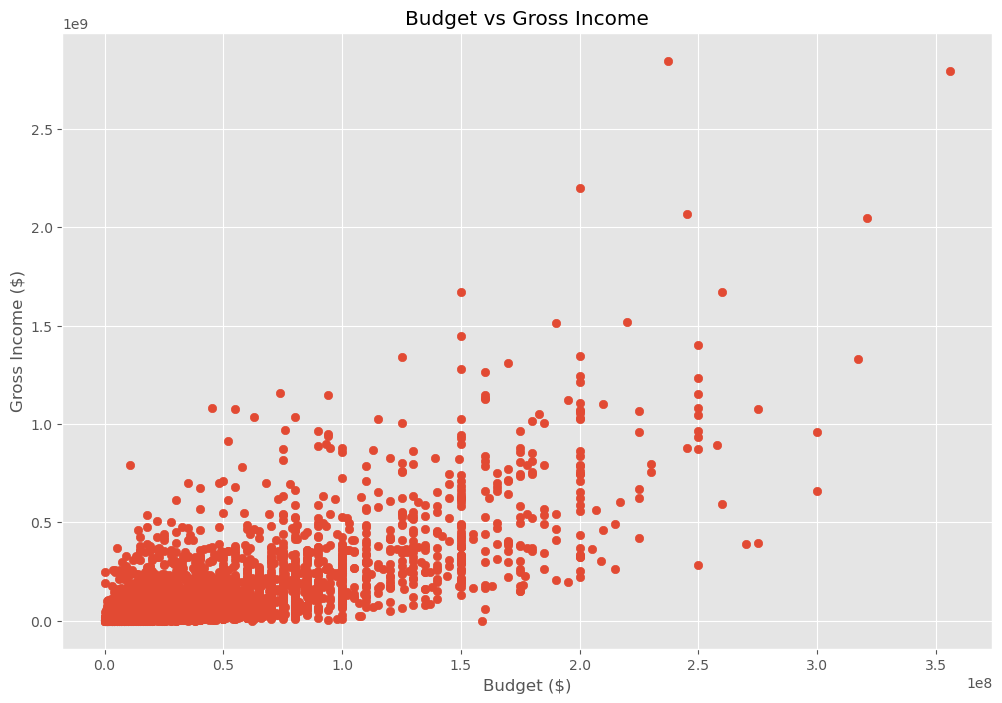

In [38]:
# Scatterplot for Budget vs Gross Income using matplotlib

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Income')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Income ($)')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

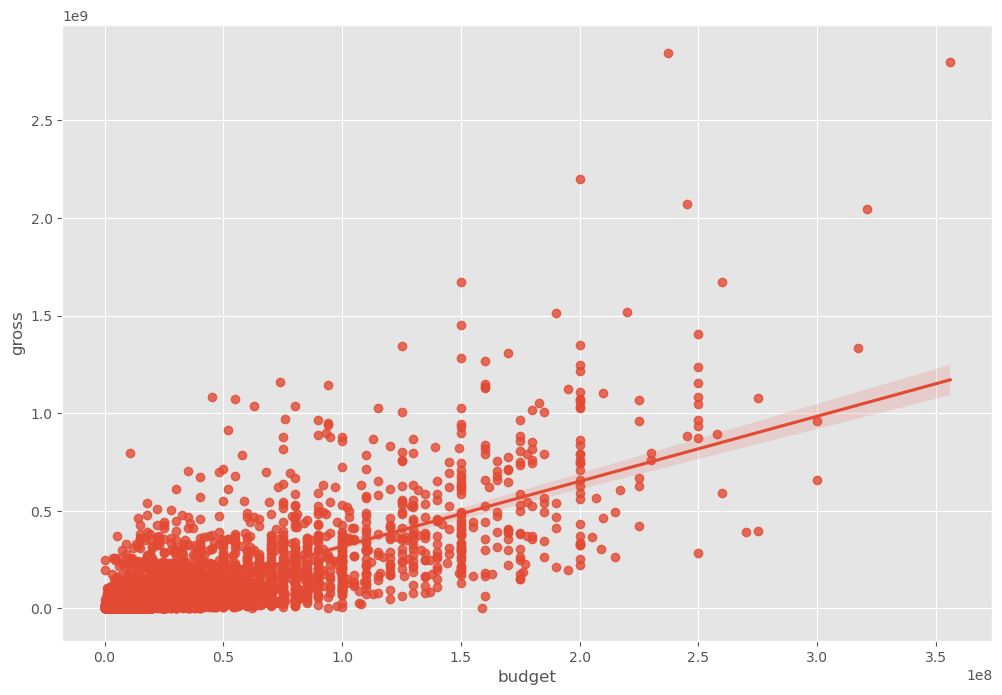

In [39]:
# Plot Budget vs Gross Income using Seaborn 

sns.regplot(x=df["budget"],y=df["gross"])

<Axes: xlabel='budget', ylabel='gross'>

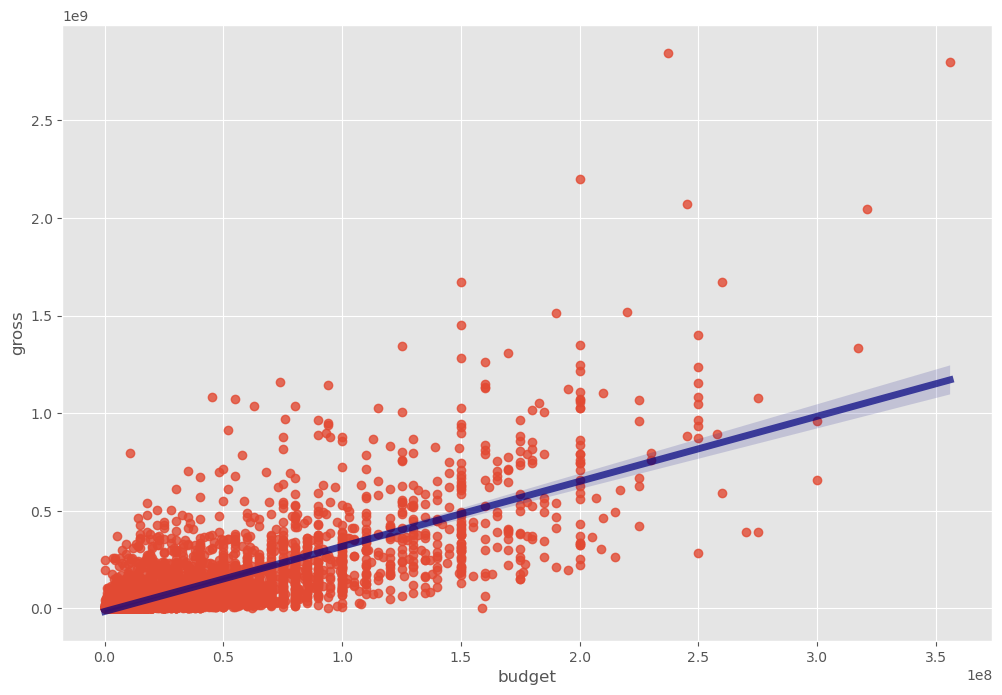

In [40]:
# Now adding colour 
sns.regplot(x=df["budget"], y=df["gross"], line_kws={"color":"navy","alpha":0.7,"lw":5})

## II - Exploring correlation among all numeric features!

### There are different types of correlation: Pearson, Kendall, Spearman. All give slightly different results.

In [41]:
df.corr()
# this is pearson by default

/var/folders/j2/f8cpfjp97vg7qf5jv4bzzgs40000gn/T/ipykernel_6028/4040201782.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [42]:
df.corr(method='kendall')

/var/folders/j2/f8cpfjp97vg7qf5jv4bzzgs40000gn/T/ipykernel_6028/1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [43]:
df.corr(method='pearson')

/var/folders/j2/f8cpfjp97vg7qf5jv4bzzgs40000gn/T/ipykernel_6028/1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
# High correlation between budget and gross

/var/folders/j2/f8cpfjp97vg7qf5jv4bzzgs40000gn/T/ipykernel_6028/335459316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


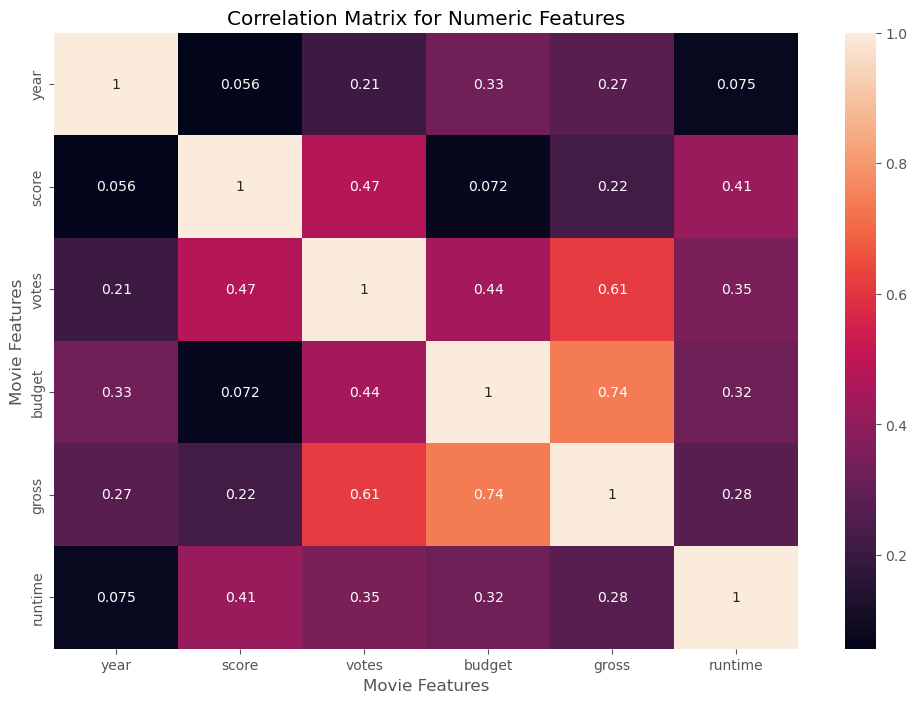

In [44]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

## III - Company/Country vs Gross Income

In [48]:
df.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [ ]:
# df.head()

In [ ]:
# in order to explore the correlation of company vs gross, we need to convert company to a numaric value. 
# In order to do this, we are going to assign a value/code to each company. 

In [61]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes #this is what is going to give the random numerization
        
df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0


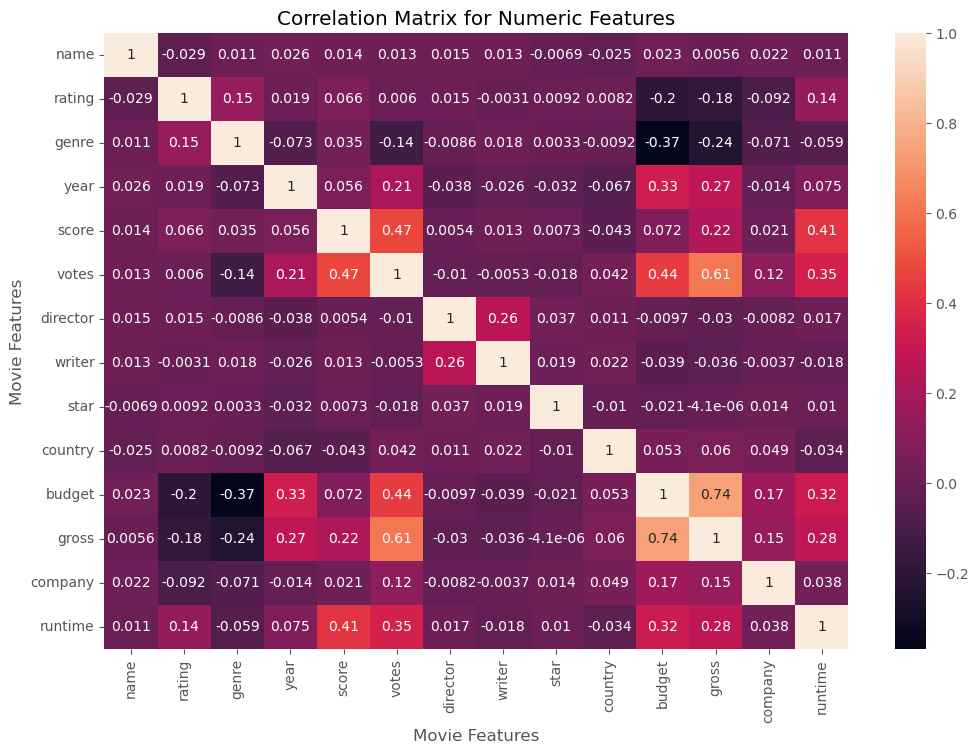

In [51]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [52]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
score,0.014450,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025908,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
country,-0.025490,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477


In [59]:
# I want to see the ones that have the highest correlation quickly, so we are going to use unstacking. 

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

In [60]:
# This sorts everything with its pair and it sorts the values from lowest correlation to highest correlation.
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

In [56]:
# Now lets isolate the pairs that have high correlations

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [1]:
# The correlation values here that are equal to 1 don't count as they are being correlated with themselves. 
# Other than those we can see that 'Budget vs Gross' and 'Gross vs Votes' have the highest correlations. 
# This indicated that the company and country really had little to do with the gross income, but votes and budget 
    # surprised us by having the highest correlation to gross income. 

# Therefore, company and country had low correlation with gross income.